# Lab 2: NLP Pipelines

In this Lab, we are going to look into NLP pipelines and their role in text processing. 

### Pipeline
A pipeline is a set of processors combined together to form a chain. A user puts their input from one end of the pipeline and gets the desired output from the other end. If you are familiar with Linux command line then you might have used the pipe command, where output of the first command becomes the input to the next command. For example: 

$ less text.txt | grep winter

Here we first look into the text file, so the output is the whole file content and then we pipe this output into the grep command, which uses this text file to search for the word winter. We can again pipe this output into another command and so on. This is what happens with NLP pipeline as well. We first start with one processing task (generally tokenization or segmentation) and then use these results to do another task like part-of-speech tagging. 

There are many NLP pipelines available. 
Small subset of usable pipelines: 
* [SpaCy](https://spacy.io/) - single implementation for each NLP component
* [Stanza](https://stanfordnlp.github.io/stanza/) -  highly accurate neural network components, can train your own models easily, supports 66 languages
* [NLTK](https://www.nltk.org/) - Multiple implementations for each NLP component, can build your own pipeline
* [UDPipe ](https://ufal.mff.cuni.cz/udpipe/1)- Trainable pipeline, language-agnostic
* [Forte](https://github.com/asyml/forte) - toolkit for building NLP pipelines, decomposes problem into data, models and tasks. More usable for building integrated systems (search documents, analyze, extract documents etc)
* [TextBlob](https://textblob.readthedocs.io/en/dev/) - extension of NLTK (simplified manner), good for small projects where state-of-the-art results are not needed 
* [CogCompNLP](https://github.com/CogComp/cogcomp-nlp) (Java tool) - developed by the University of Illinois, can process text (locally and remotely), a lot of components. 

In this Lab, we will use [Stanza](https://stanfordnlp.github.io/stanza/) pipeline. 

In [1]:
!pip install stanza

     |████████████████████████████████| 286kB 6.7MB/s 


In [2]:
import stanza
stanza.download('en') # download the appropriate models 
import pandas as pd

2021-02-16 14:32:20 INFO: Downloading default packages for language: en (English)...
2021-02-16 14:32:38 INFO: Finished downloading models and saved to /root/stanza_resources.



<img src="https://stanfordnlp.github.io/stanza/assets/images/pipeline.png" >




Stanza pipeline contains many processors that depend on each other: 
* tokenize processor, 
* multi-word tokens (MWT) processor, 
* POS processor, 
* lemma processor, 
* depparse processor, 
* NER (named entity recognizer) processor,
* sentiment processor. 

Each of these processors have specific requirements. For example depparse processor needs tokenize, MWT, POS and lemma annotations. 

We can define the pipeline as follows: 

In [3]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse, ner, sentiment') #mwt is not available from official model list


2021-02-16 14:34:30 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-16 14:34:30 INFO: Use device: cpu
2021-02-16 14:34:30 INFO: Loading: tokenize
2021-02-16 14:34:30 INFO: Loading: pos
2021-02-16 14:34:31 INFO: Loading: lemma
2021-02-16 14:34:31 INFO: Loading: depparse
2021-02-16 14:34:31 INFO: Loading: sentiment
2021-02-16 14:34:32 INFO: Loading: ner
2021-02-16 14:34:33 INFO: Done loading processors!


In [ ]:
nlp = stanza.Pipeline(lang='en', processors='depparse') 

In [5]:
raw_text = ("The brown fox is quick and he is jumping over the lazy dog" )
print(raw_text)

The brown fox is quick and he is jumping over the lazy dog


Lets analyse this text with Stanza pipeline: 

In [6]:
doc = nlp(raw_text)
print(doc)

[
  [
    {
      "id": 1,
      "text": "The",
      "lemma": "the",
      "upos": "DET",
      "xpos": "DT",
      "feats": "Definite=Def|PronType=Art",
      "head": 3,
      "deprel": "det",
      "misc": "start_char=0|end_char=3",
      "ner": "O"
    },
    {
      "id": 2,
      "text": "brown",
      "lemma": "brown",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "head": 3,
      "deprel": "amod",
      "misc": "start_char=4|end_char=9",
      "ner": "O"
    },
    {
      "id": 3,
      "text": "fox",
      "lemma": "fox",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 5,
      "deprel": "nsubj",
      "misc": "start_char=10|end_char=13",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "is",
      "lemma": "be",
      "upos": "AUX",
      "xpos": "VBZ",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 5,
      "deprel": "cop",
      "misc": "start_char=14|end_ch

After analysis, the pipeline gives you the Document object.
Document has the following properties: text, sentences, entities, num_tokens, num_words. A Sentence objects inside Document represents a sentence, this object contains a list of Tokens. 



In [12]:
print(f"Text: {doc.sentences[0].text}")
print(f"Dependencies: {doc.sentences[0].dependencies[0]}")
print(f"Tokens: {doc.sentences[0].tokens[0]}")
print(f"Words: {doc.sentences[0].words[0]}")
print(f"XPOS: {doc.sentences[0].words[0].xpos}")
print(f"Entities: {doc.sentences[0].entities}")
print(f"Sentiment: {doc.sentences[0].sentiment}") # Available for English, Chinese, German

Text: The brown fox is quick and he is jumping over the lazy dog
Dependencies: ({
  "id": 3,
  "text": "fox",
  "lemma": "fox",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Number=Sing",
  "head": 5,
  "deprel": "nsubj",
  "misc": "start_char=10|end_char=13"
}, 'det', {
  "id": 1,
  "text": "The",
  "lemma": "the",
  "upos": "DET",
  "xpos": "DT",
  "feats": "Definite=Def|PronType=Art",
  "head": 3,
  "deprel": "det",
  "misc": "start_char=0|end_char=3"
})
Tokens: [
  {
    "id": 1,
    "text": "The",
    "lemma": "the",
    "upos": "DET",
    "xpos": "DT",
    "feats": "Definite=Def|PronType=Art",
    "head": 3,
    "deprel": "det",
    "misc": "start_char=0|end_char=3",
    "ner": "O"
  }
]
Words: {
  "id": 1,
  "text": "The",
  "lemma": "the",
  "upos": "DET",
  "xpos": "DT",
  "feats": "Definite=Def|PronType=Art",
  "head": 3,
  "deprel": "det",
  "misc": "start_char=0|end_char=3"
}
XPOS: DT
Entities: []
Sentiment: 1


 Finally, a Word object has all the analysis results, that can be accesses with the following attributes: id, text, lemma, xpos, upos, feats (morphological features), head , deprel (dependency relation between this word and its head), and misc .

### Part of Speech 
Parts of speech (POS) are specific lexical categories to which words are assigned based
on their syntactic context and role. 
The main POS are nouns, verbs, adjectives, and
adverbs. The process of classifying and labeling POS tags for words is defined as parts of
speech tagging (POS tagging).

Stanza outputs universal POS (UPOS) and language sepcific POS (XPOS). 



In [13]:
pos_tagged = [ (word.text, word.upos, word.xpos) for word in doc.sentences[0].words]
pd.DataFrame(pos_tagged, columns=['Word', 'UPOS', 'XPOS']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Word,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
UPOS,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN
XPOS,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


1	Raudsepa	Raud_sepp	PROPN	O	Case=Gen|Number=Sing	2	nmod	start_char=0|end_char=8	_
2	talus	talu	NOUN	O	Case=Ine|Number=Sing	3	obl	start_char=9|end_char=14	_
3	sülemlesid	sülema	VERB	O	Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act	0	root	start_char=15|end_char=25	_
4	mesilased	mesilane	NOUN	O	Case=Nom|Number=Plur	3	nsubj	start_char=26|end_char=35	_
5	topeltsülemis	topelt_sülem	NOUN	O	Case=Ine|Number=Sing	3	obl	start_char=36|end_char=49	_
6	.	.	PUNCT	O	_	3	punct	start_char=50|end_char=51	_

1	VIIO	ViiO	PROPN	B-PER	Case=Nom|Number=Sing	0	root	start_char=0|end_char=4	_
2	AITSAM	Aitsam	PROPN	B-PER	Case=Nom|Number=Sing	1	flat	start_char=5|end_char=11	_

1	Ka	ka	ADV	O	_	3	advmod	start_char=0|end_char=2	_
2	halval	halb	ADJ	O	Case=Ade|Degree=Pos|Number=Sing	3	amod	start_char=3|end_char=9	_
3	lapsel	laps	NOUN	O	Case=Ade|Number=Sing	0	root	start_char=10|end_char=16	_
4	on	olema	AUX	O	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	3	cop	start_char=17|end_char=19	_
5	mitu	mitu	DET	O	Case=Nom|Number=Sing|PronType=Ind	6	det	start_char=20|end_char=24	_
6	nime	nimi	NOUN	O	Case=Par|Number=Sing	3	nsubj:cop	start_char=25|end_char=29	_


### Morphological Tagging
By definition, a morpheme is the smallest unit of
language that has distinctive meaning. This includes things like
words, prefixes, suffixes, and so on, which have their own distinct
meaning. Morphology is the study of the structure and meaning of
these distinctive units or morphemes in a language. There are specific
rules and syntaxes that govern the way morphemes can combine. For example, the word unbreakable is composed of three morphemes: 
* *un* - a bound morpheme signifying *not*
* *break* - the root morpheme 
* *able* - a free morpheme signifying *can be done*

In the UD corpora, these attributes are annotated as feature-value pairs for each
token.

In [14]:
morph_tagged = [(word.text, word.feats) for word in doc.sentences[0].words]
pd.DataFrame(morph_tagged, columns=['Word', 'Feats'])

,Word,Feats
0,The,Definite=Def|PronType=Art
1,brown,Degree=Pos
2,fox,Number=Sing
3,is,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbF...
4,quick,Degree=Pos
5,and,None
6,he,Case=Nom|Gender=Masc|Number=Sing|Person=3|Pron...
7,is,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbF...
8,jumping,Tense=Pres|VerbForm=Part
9,over,None


### Dependency Parsing

Syntax usually envolves the study of sentences, phrases, words, and
their structures. This includes researching how words are combined
grammatically to form phrases and sentences. Syntactic order of
words used in a phrase or a sentence matter since the order can
change the meaning entirely.

In dependency-based parsing, we try to use dependency-based grammars to analyze
and infer both structure and semantic dependencies and relationships between tokens
in a sentence.

The basic principle behind a dependency grammar is that in any sentence in the
language, all words except one have some relationship or dependency on other words
in the sentence. The word that has no dependency is called the root of the sentence. The
verb is taken as the root of the sentence in most cases. All the other words are directly or
indirectly linked to the root verb using links , which are the dependencies

Stanza outputs the head and deprel, head being the head of the word, which is either value of ID or zero (meaning that the word is the root), and deprel being the relation to the head. 



In [15]:
synt_tagged = [(word.text, word.head, word.deprel) for word in doc.sentences[0].words]
pd.DataFrame(synt_tagged, columns=['Word', 'Head', 'Deprel']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Word,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
Head,3,3,5,5,0,9,9,9,5,13,13,13,9
Deprel,det,amod,nsubj,cop,root,cc,nsubj,aux,conj,case,det,amod,obl


We can also visualize the dependency syntax tree using SpaCy: 

In [ ]:
import spacy
from spacy import displacy
!python -m spacy download en_core_web_sm


In [17]:
nlp_spacy =  spacy.load("en_core_web_sm")
displacy.render(nlp_spacy(raw_text), jupyter=True, options={'distance':100, 'arrow_stroke':1.5, 'arrow_width':8})

### Named Entity Recognition

A classical problem in information extraction is to recognize and extract mentions of
named entities in text. In news documents, the core entity types are people, locations, and
organizations; more recently, the task has been extended to include amounts of money,
percentages, dates, and times.

Usually BIO notation is used for named entity recognition. Each token at the
beginning of a name span is labeled with a B- prefix; each token within a name span is labeled with an I- prefix. These prefixes are followed by a tag for the entity type, e.g. B-LOC
for the beginning of a location. Tokens
that are not parts of name spans are labeled as O.

Stanza uses BIOES representation, where E denotes ending and S denotes single element. 

In [25]:
ner_text = "The U.S. Army captured Atlanta on May 14, 1864."
ner_doc = nlp(ner_text)
ner_tagged = [(word.text, word.ner) for word in ner_doc.sentences[0].tokens]
pd.DataFrame(ner_tagged, columns=['Word', 'NER']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,The,U.S.,Army,captured,Atlanta,on,May,14,",",1864,.
NER,B-ORG,I-ORG,E-ORG,O,S-GPE,O,B-DATE,I-DATE,I-DATE,E-DATE,O


Now we can put the whole output in [ConNLL-U format](https://universaldependencies.org/format.html): 

In [26]:
columns = ['ID', 'FORM', 'LEMMA', 'UPOS', 'XPOS', 'FEATS', 'HEAD', 'DEPREL', 'DEPS', 'MISC']
tagged = [(word.id, word.text, word.lemma, word.upos, word.xpos, word.feats, word.head, word.deprel, word.deps, word.misc) for word in doc.sentences[0].words]
pd.DataFrame(tagged, columns=columns)

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
0,1,The,the,DET,DT,Definite=Def|PronType=Art,3,det,None,start_char=0|end_char=3
1,2,brown,brown,ADJ,JJ,Degree=Pos,3,amod,None,start_char=4|end_char=9
2,3,fox,fox,NOUN,NN,Number=Sing,5,nsubj,None,start_char=10|end_char=13
3,4,is,be,AUX,VBZ,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbF...,5,cop,None,start_char=14|end_char=16
4,5,quick,quick,ADJ,JJ,Degree=Pos,0,root,None,start_char=17|end_char=22
5,6,and,and,CCONJ,CC,None,9,cc,None,start_char=23|end_char=26
6,7,he,he,PRON,PRP,Case=Nom|Gender=Masc|Number=Sing|Person=3|Pron...,9,nsubj,None,start_char=27|end_char=29
7,8,is,be,AUX,VBZ,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbF...,9,aux,None,start_char=30|end_char=32
8,9,jumping,jump,VERB,VBG,Tense=Pres|VerbForm=Part,5,conj,None,start_char=33|end_char=40
9,10,over,over,ADP,IN,None,13,case,None,start_char=41|end_char=45


### Performance 

You can check the performance for other treebanks [here](https://stanfordnlp.github.io/stanza/performance.html). 

In [ ]:
columns = ['Treebank','Tokens', 'Sentences', 'UPOS', 'XPOS', 'Feats', 'UAS', 'LAS', 'LEMMAS']
results = [('UD_English-EWT', 99.01,	81.13, 95.4,	95.12, 96.11, 86.22,	83.59,	97.21),
           ('UD_Estonian-EDT', 99.96, 93.32, 97.19,98.04, 95.77,86.68, 83.82, 96.05 ), 
           ('UD_Russian-SynTagRus',99.57,	98.86, 98.2,	99.57,	95.91, 	92.38,	90.6 ,97.51)]
pd.DataFrame(results, columns=columns)

,Treebank,Tokens,Sentences,UPOS,XPOS,Feats,UAS,LAS,LEMMAS
0,UD_English-EWT,99.01,81.13,95.40,95.12,96.11,86.22,83.59,97.21
1,UD_Estonian-EDT,99.96,93.32,97.19,98.04,95.77,86.68,83.82,96.05
2,UD_Russian-SynTagRus,99.57,98.86,98.20,99.57,95.91,92.38,90.60,97.51


What can we now do with all of this information? 

1. Input to another task in NLP like summarization, information extraction, machine translation etc. 
2. Extract some phrases, sentences (for example, extract NOUN-VERB pairs for further analysis like clustering) 
3. any more ideas? 

Why it might be a bad idea to use pretrained pipelines? 





### Analysing movie "The Room"
Let's analyse one of the greatest movies of all time "The Room" by Tommy Wiseau.

We know that the main character Johnny shot himself dead in the end. The question is can we see that his mood changes from his text.

In [27]:
johnny_lines = []
with  open('the_room.txt', 'r', encoding='utf-8') as f: 
  for line in f: 
    if line.startswith('Johnny:'):
      johnny_lines.append(line.strip().replace('Johnny:', ''))
    

In [28]:
johnny_lines[0], johnny_lines[-1]

(' Hi babe! I have something for you.',
 ' Why? Why is this happening to me? Why?! It’s over. God, forgive me.')

In [29]:
from tqdm.notebook import tqdm

analysed_lines = []
for johnny_line in tqdm(johnny_lines): 
  doc = nlp(johnny_line)
  analysed_lines.append(sum([sent.sentiment for sent in doc.sentences])/len(doc.sentences))

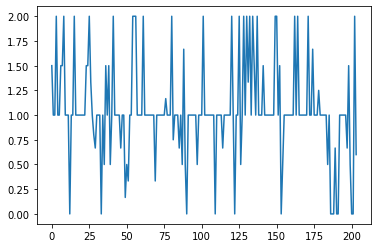

In [36]:
plt.plot(analysed_lines)

(array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 128.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

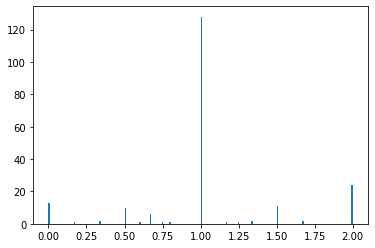

In [35]:
import matplotlib.pyplot as plt
plt.hist(analysed_lines, bins=len(analysed_lines))

Did it work and why? 

In [ ]:
... # alternate approach